# Naive baseline comparison

In [67]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(rlist)
source("helper.r")
theme_set(theme_pubr())

### Data Preparation for Comparison of tree-based and baseline methods

Evaluation metrics of our method (Table 2 of our paper)

In [13]:
# path to folder, with folders for dataset results
path = "../data/runs/mlp/"
datasets = list.files(path)

# create list with one list containing one dataframe per dataset
data.list = lapply(datasets, function(data){
  
  data.path = paste0(path, data, "/2_3_effects_and_trees/")
  objectives = 'eval_SS_L2_20_1000.rds'
  
  for(i in 1:length(objectives)){
 
    res = readRDS(paste0(data.path,"/", objectives[i]))
    df.sub = res$result[[1]]$eval
    df.sub$objective = res$objective
    
    if(i == 1) df = df.sub
    else df = rbind(df, df.sub)
  }
  
  return(df)
})
names(data.list) = datasets

prepare data for plotting -- tree-based partitioning method with L2 distance

In [40]:
data.tree = do.call("rbind", data.list)
data.tree = data.tree[data.tree$depth == 7,]
data.plot.tree = data.frame(objective = data.tree$objective, hyperparameter = data.tree$feature, depth = data.tree$depth, neg_loglik = data.tree$neg_loglik, source.neg_loglik = data.tree$source.neg_loglik, MC = data.tree$conf.rel, OC = data.tree$conf.rel.opt.1)
data.plot.tree$NLL = (data.plot.tree$source.neg_loglik - data.plot.tree$neg_loglik)/abs(data.plot.tree$source.neg_loglik)
data.plot.tree$method = "tree partitioning"

Evaluation metrics of baseline method

In [70]:
# path to folder, with folders for dataset results
path = "../data/runs/naive_baseline/"
datasets = list.files(path)

# create list with one list containing one dataframe per dataset
data.list.naive = lapply(datasets, function(data){
    data.path = paste0(path, data)
    objective = list.files(data.path)
    res = readRDS(paste0(data.path, "/",objective))
    colnames(res)[which(colnames(res)=="result.feature")] = "feature"
    colnames(res)[which(colnames(res)=="result.depth")] = "depth"
    df = res
    df$objective = "naive_baseline"
    
    return(df) 
  
})
names(data.list.naive) = datasets


prepare data for plotting -- naive basline method

In [71]:
data.naive = do.call("rbind", data.list.naive)
data.plot.naive = data.frame(objective = data.naive$objective, hyperparameter = data.naive$feature, depth = data.naive$depth, neg_loglik = data.naive$result.neg_loglik, source.neg_loglik = data.naive$result.source.neg_loglik, MC = data.naive$result.conf.rel, OC = data.naive$result.conf.rel.opt.1)
data.plot.naive$NLL = (data.plot.naive$source.neg_loglik - data.plot.naive$neg_loglik)/abs(data.plot.naive$source.neg_loglik)
data.plot.naive$method = "baseline"

combine data of tree-based partitioning method and baseline method

In [42]:
data.plot = rbind(data.plot.tree, data.plot.naive)
data.plot = data.plot[,c(2,6:9)]
library(tidyr)
data.plot = data.plot %>% gather(metric, value, -c(hyperparameter, method))

create boxplots for comparison of evauluation metrics

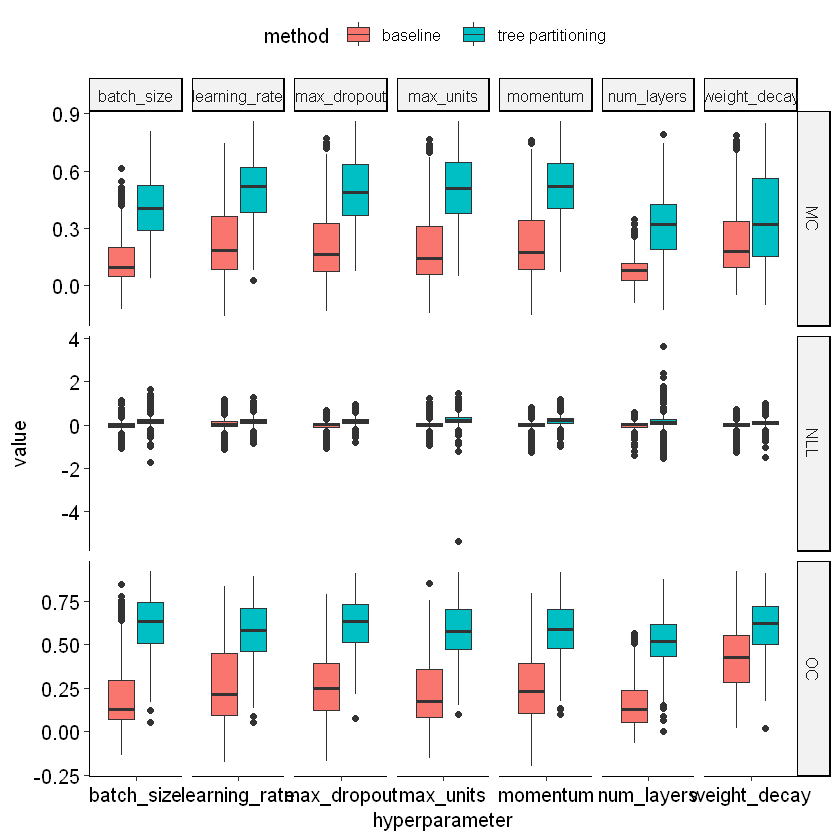

In [60]:
p = ggplot(data.plot, aes(x = hyperparameter, y = value )) + geom_boxplot(aes(fill = method)) + facet_grid(metric~hyperparameter, scale = "free")
p
ggsave("baseline_comp.png", p, width = 8, height = 10)

### Create Table 11  for baseline method on feature level 

In [74]:
df.conf       = create_table_features(data.list = data.list.naive, objective = "naive_baseline", target = "result.conf.rel", depth = 7)
df.conf.opt   = create_table_features(data.list = data.list.naive, objective = "naive_baseline", target = "result.conf.rel.opt.1", depth = 7)
df.neg_loglik = create_table_features(data.list = data.list.naive, objective = "naive_baseline", target = "result.neg_loglik.rel", depth = 7)
df.features   = cbind(df.conf, df.conf.opt[,2:3], df.neg_loglik[,2:3])
df.features[,2:7] = round(df.features[,2:7]*100, 1)
names(df.features) = c("hyperparameter", "MC.mean", "MC.sd", "OC.mean", "OC.sd", "NLL.mean", "NLL.sd")
print(df.features)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

  hyperparameter MC.mean MC.sd OC.mean OC.sd NLL.mean NLL.sd
1     batch_size    13.7  12.1    18.9  16.0      1.4   21.6
2  learning_rate    23.1  17.7    27.2  20.7     -3.4   27.0
3    max_dropout    21.1  16.8    26.7  16.8      3.3   22.1
4      max_units    19.1  16.5    22.0  17.1     -1.4   19.7
5       momentum    21.9  16.4    25.3  16.9      2.1   25.4
6     num_layers     8.1   5.9    15.4  12.8      0.9   11.8
7   weight_decay    22.6  15.9    41.7  15.8      2.2   24.2
